/tmp/ipykernel_2205504/1407647696.py:36: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()  # Adjust layout for better appearance
/home/billyzhang/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


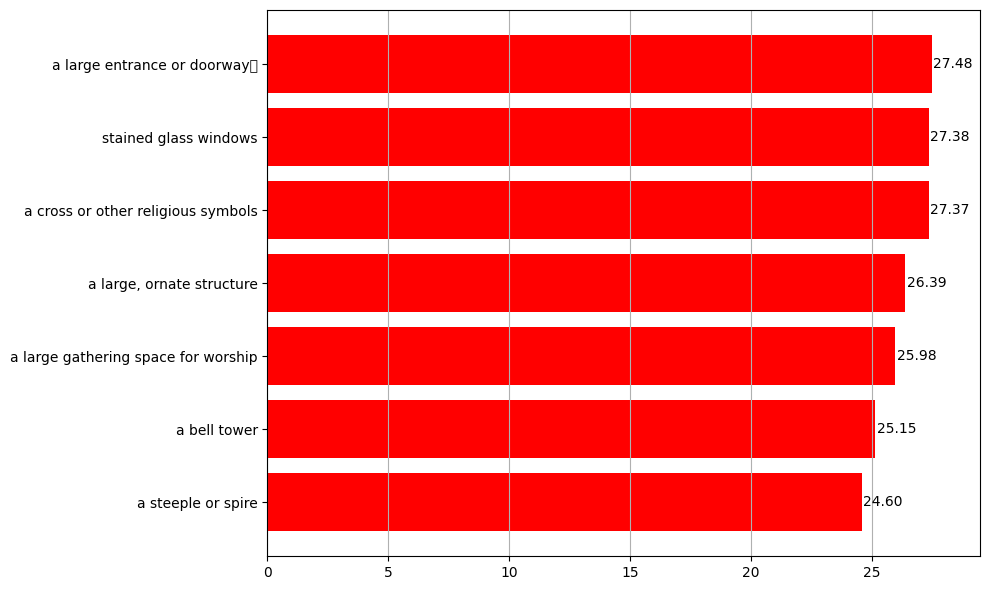

In [13]:
import matplotlib.pyplot as plt

# Data from the image
categories = [
    "a large entrance or doorway	",
    'stained glass windows',
    'a cross or other religious symbols',
    'a large, ornate structure',
    "a large gathering space for worship",
    "a bell tower",
    "a steeple or spire"
]
values = [27.48, 27.38, 27.37, 26.39, 25.98, 25.15, 24.60]

# Creating the bar chart
plt.figure(figsize=(10,6))  # Set the figure size
bars = plt.barh(categories, values, color='red')  # Horizontal bar chart
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest value at the top

plt.xlim(0, max(values) + 2)  # Added 2 units for the text

# Adding title, labels, and grid
# plt.title('Average')
# plt.xlabel('Values')
plt.grid(axis='x')

# Adding values next to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.05,  # X position
             bar.get_y() + bar.get_height()/2,  # Y position
             '{:.2f}'.format(bar.get_width()),  # Value
             va='center',  # Vertical alignment
             ha='left')  # Horizontal alignment

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


In [13]:
import os
import shutil
import pandas as pd

In [12]:
# iterate over images in "geode_africa", "geode_americas", "geode_eastasia", "geode_europe", "geode_southeastasia", "geode_westasia" and put them into the corresponding folder based on the object name
root_path = "/local2/data/xuanming/"
for folder in ["geode_africa", "geode_americas", "geode_eastasia", "geode_europe", "geode_southeastasia", "geode_westasia"]:
    for class_dir in os.listdir(root_path + folder + "/images"):
        # print(class_dir)
        # create the folder for the object in /local2/data/xuanming/geode/images
        if not os.path.exists(root_path + "geode" + "/images/" + class_dir):
            # print(root_path + folder + "/images/" + class_dir)
            os.makedirs(root_path + "geode" + "/images/" + class_dir)

        # copy the images to the corresponding folder
        for file in os.listdir(root_path + folder + "/images/" + class_dir):
            if file.endswith(".jpg"):
                shutil.copy(root_path + folder + "/images/" + class_dir + "/" + file, root_path + "geode" + "/images/" + class_dir + "/" + file)

In [15]:
# iterate over index.csv in "geode_africa", "geode_americas", "geode_eastasia", "geode_europe", "geode_southeastasia", "geode_westasia" and concatenate them to a new index.csv in /local2/data/xuanming/geode
index = pd.concat([pd.read_csv(root_path + folder + "/index.csv") for folder in ["geode_africa", "geode_americas", "geode_eastasia", "geode_europe", "geode_southeastasia", "geode_westasia"]], ignore_index=True)
index.to_csv(root_path + "geode" + "/index.csv", index=False)

In [ ]:
##### convert original "geode" dataset to "geode_flat" and "geode_{region}" datasets
orig_root_path = "/local2/data/xuanming/geode/"  # REPLACE THIS WITH YOUR OWN PATH


In [ ]:
import os
from openai import OpenAI
import json
import pandas as pd

import itertools

from descriptor_strings import stringtolist

import api_secrets
os.environ['OPENAI_API_KEY'] = api_secrets.openai_api_key
client = OpenAI(
    api_key=os.environ["OPENAI_API_KEY"],
    organization=api_secrets.openai_org
)